In [1]:
import sympy as sp

In [2]:
a = -3
t1 = 4
t2 = 2
T = t1 + t2

In [3]:
t = sp.symbols('t')
f = sp.Piecewise((2 , (a - T  < t )&( t < a + t1 - T)),
                 (-1, (a + t1 - T < t )&( t < a)),
                 (2 , (a < t      )&( t < a + t1)),
                 (-1, (a + t1 < t )&( t < a + T)),
                 (2 , (a + T  < t )&( t < a + t1 + T)),
                 (-1, (a + t1 + T < t )&( t < a + 2 * T)),
                 (2 , (a + 2*T < t )&( t < a + t1 + 2 * T)),
                 (-1, (a + t1 + 2 * T < t )&( t < a + 3 * T)),
                 (2 , (a + 3*T < t )&( t < a + t1 + 3*T)))

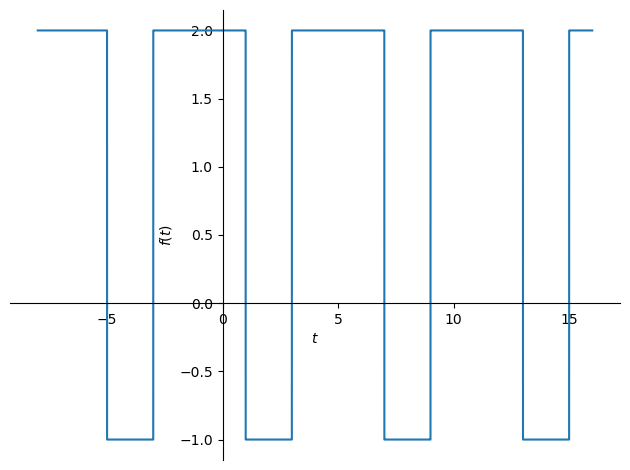

In [4]:
sp.plot(f,(t,-8,16));

In [5]:
A=[]
B=[]
f_fourier = sp.symbols('f',cls=sp.Function)
N = 50
for n in range(N):
    A.append(sp.integrate(f*sp.cos(n*t*2*sp.pi/T),(t,a,a+T))*2/T)
    B.append(sp.integrate(f*sp.sin(n*t*2*sp.pi/T),(t,a,a+T))*2/T)
    if n == 0:
        f_fourier = A[0]/2
    else:
        f_fourier = f_fourier + A[n]*sp.cos(n*t*2*sp.pi/T)+B[n]*sp.sin(n*t*2*sp.pi/T)

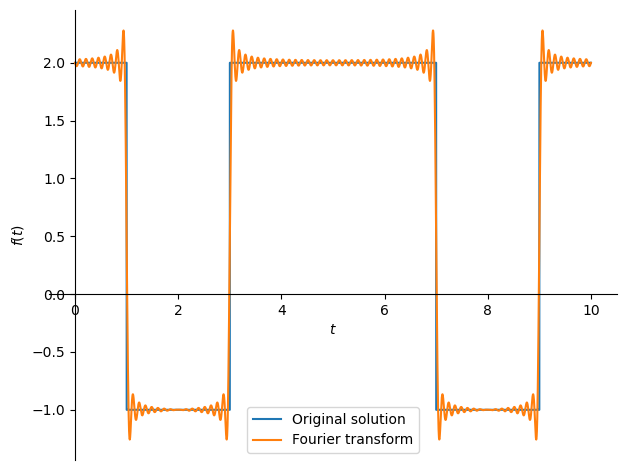

In [6]:
p0 = sp.plotting.plot(f,(t,0,10),label='Original solution' ,legend=True,show=False)
p1 = sp.plotting.plot(f_fourier,(t,0,10),label='Fourier transform',legend=True,show=False,adaptive=False,nb_of_points=4000)
p0.append(p1[0])
p0.show()